In [46]:

import os
import math
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display

## 1.  Importing Dataset


In [47]:

dt=pd.read_csv("Housing.csv")
dt.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2. Understanding the Data¶


In [48]:

dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [49]:
dt.tail(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [50]:
dt.dtypes


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [51]:
#missing_values
dt.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No missing values

In [52]:
dt.shape

(545, 13)

 Inference: The Datset consists of 13 features & 545 samples.


In [53]:
dt.describe() # data stats


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Interpretation: 
count: The number of non-empty (non-NaN) entries in each column.
mean: The average value of the entries in each column.
std: The standard deviation of the entries in each column, which is a measure of the dispersion of the dataset.
min: The minimum value in each column.
25% (first quartile): The value below which 25% of the data falls.
50% (median): The median value of each column.
75% (third quartile): The value below which 75% of the data falls.
max: The maximum value in each column.

In [54]:
dt.duplicated().sum() # duplicate values check

0

No duplicated variables

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

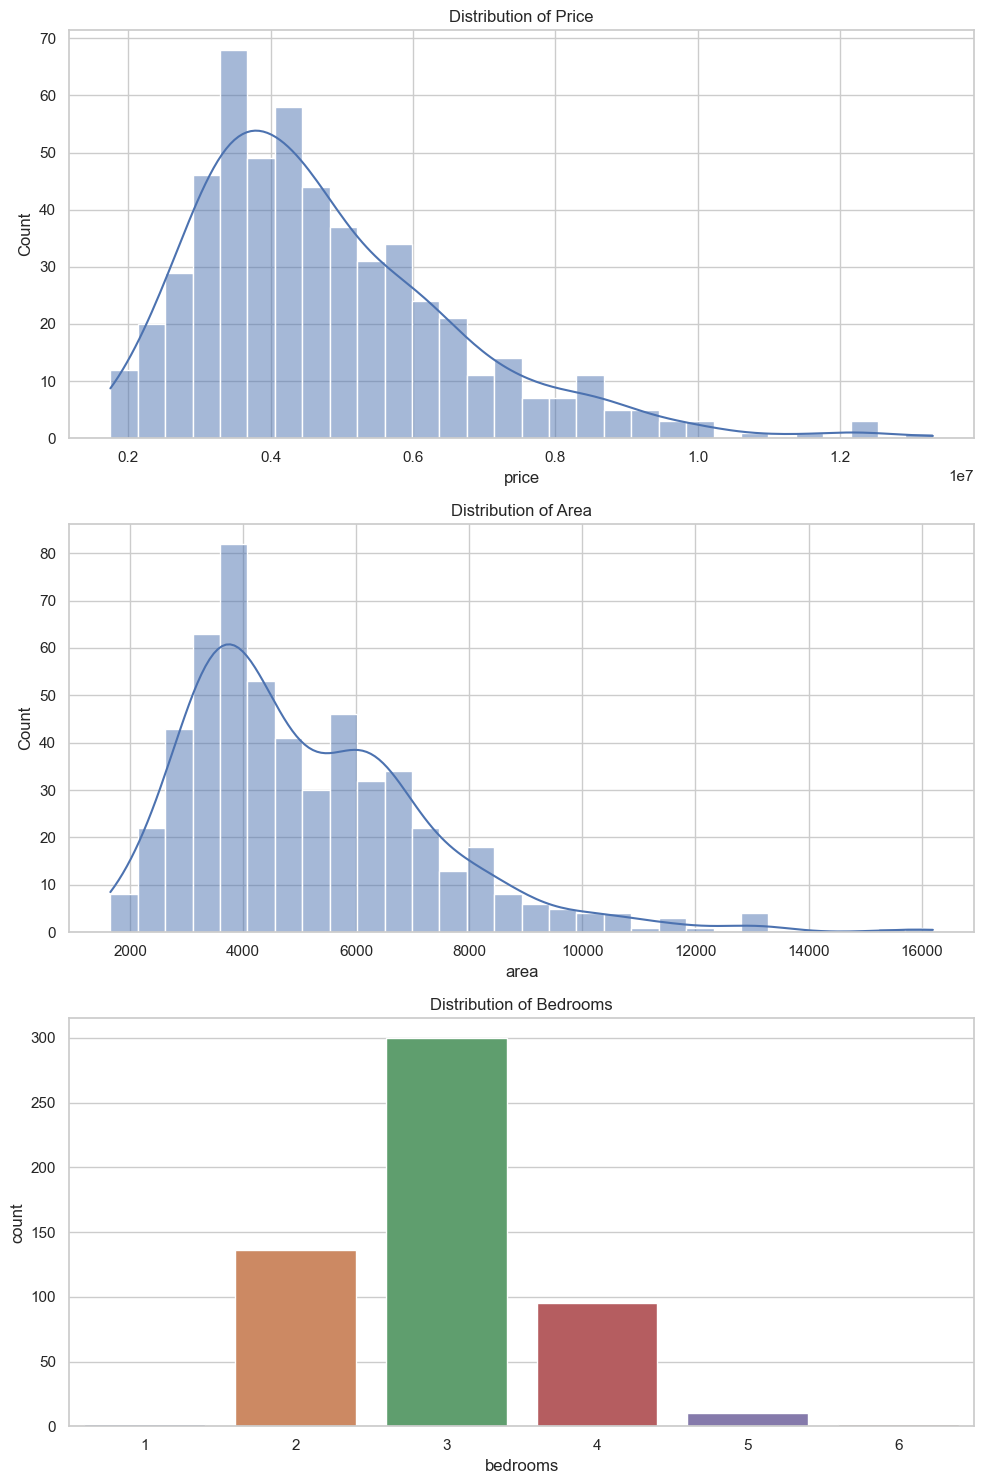

In [94]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to host the plots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot distributions of 'price', 'area', and 'bedrooms'
sns.histplot(dt['price'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Price')

sns.histplot(dt['area'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Area')

sns.countplot(x='bedrooms', data=dt, ax=ax[2])
ax[2].set_title('Distribution of Bedrooms')

plt.tight_layout()
plt.show()


## 3. Exploratory Data Analysis 

C:\Users\HP\AppData\Local\Temp\ipykernel_12708\1057646678.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

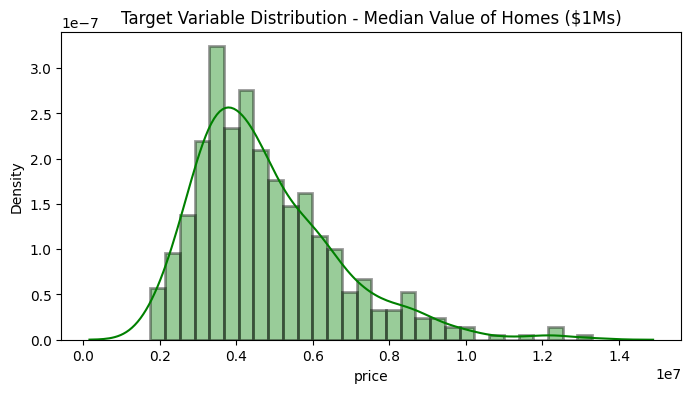

In [56]:
target = 'price'
features = [i for i in dt.columns if i not in [target]]

original_dt = dt.copy(deep=True)
plt.figure(figsize=[8,4])
sns.distplot(dt[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Inference:The Target Variable seems to be be normally distributed, averaging around 20 units.



## Identify categorical and numerical features


In [61]:
numerical_features = dt.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = dt.select_dtypes(include=['object']).columns.tolist()

# Count the number of categorical and numerical features
num_categorical_features = len(categorical_features)
num_numerical_features = len(numerical_features)

print(f"Number of categorical features: {num_categorical_features}")
print(f"Number of numerical features: {num_numerical_features}")

Number of categorical features: 7
Number of numerical features: 6


6 numerical features: price, area, bedrooms, bathrooms, stories, parking.
7 categorical features: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus.

In [62]:
categorical_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']

dt[categorical_col]


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


### Visualising the categorical features 


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

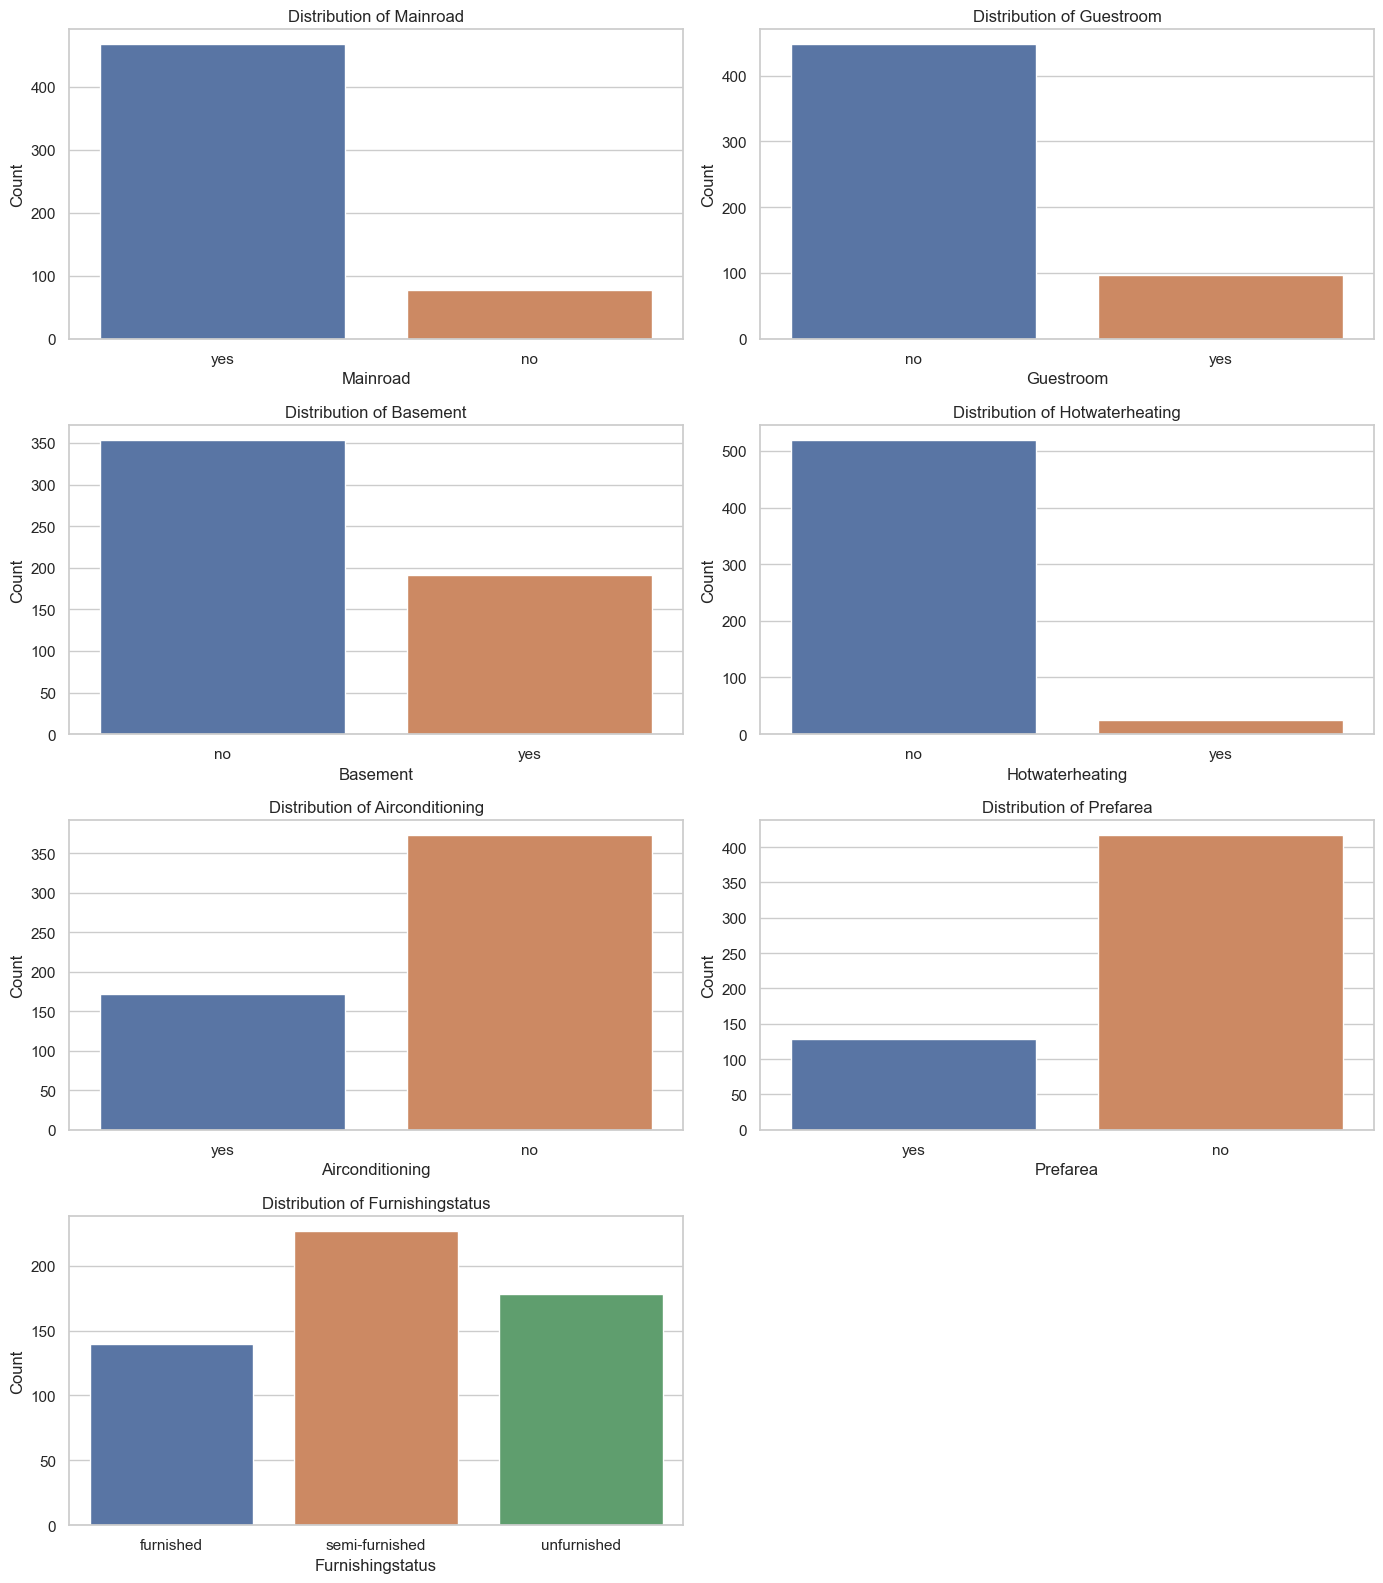

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dt' is your pandas DataFrame and you have already loaded your dataset
# and 'categorical_col' is the list of categorical column names

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Define a function to create count plots for categorical features
def plot_categorical_features(categorical_data, features):
    # Calculate the number of rows needed for subplots
    n_rows = len(features) // 2 + len(features) % 2

    # Create subplots
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 4))
    axes = axes.flatten()  # Flatten the array of axes

    # Create a count plot for each categorical feature
    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=categorical_data, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature.capitalize()}')
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel('Count')

    # Remove any unused subplots
    for ax in axes[len(features):]:
        ax.remove()

    plt.tight_layout()
    plt.show()

# Display count plots for categorical features
plot_categorical_features(dt, categorical_col)


### Handling Categorical Data with Dummy Variable




In [68]:
dummy_col = pd.get_dummies(dt['furnishingstatus'])

dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [69]:
dummy_col = pd.get_dummies(dt['furnishingstatus'], drop_first = True)
dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [71]:
house_price = pd.concat([dt, dummy_col], axis = 1)
house_price.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,False,False


In [72]:
house_price.drop(['furnishingstatus'], axis = 1, inplace = True)
house_price.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,False,False


### visualizing numerical features 

In [ ]:
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']



C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

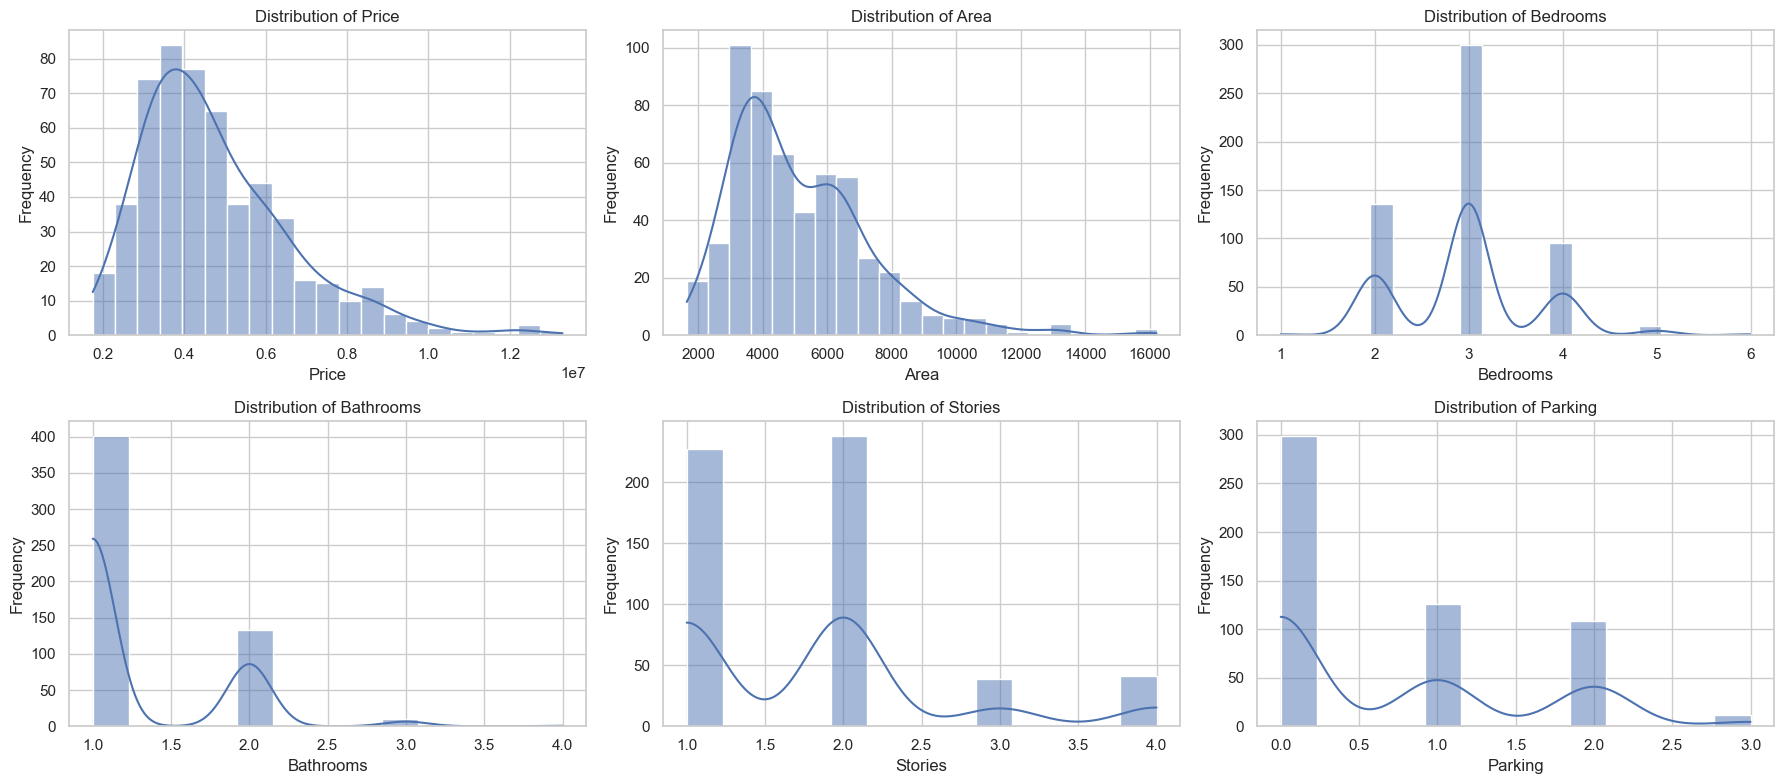

In [73]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Define a function to create distribution plots for numerical features
def plot_numerical_features(numeric_data, features):
    # Calculate the number of rows needed for subplots
    n_rows = len(features) // 3 + len(features) % 3

    # Create subplots
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
    axes = axes.flatten()  # Flatten the array of axes

    # Create a distribution plot for each numerical feature
    for i, feature in enumerate(features):
        sns.histplot(numeric_data[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature.capitalize()}')
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel('Frequency')

    # Remove any unused subplots
    for ax in axes[len(features):]:
        ax.remove()

    plt.tight_layout()
    plt.show()

# Display distribution plots for numerical features
plot_numerical_features(dt, numerical_features)

### Sampling


### simple samling 

In [74]:
# Identify the size of the dataset
dataset_size = len(dt)

# Choose a sample size - as a rule of thumb, let's take a sample size of around 30% of the dataset
sample_size = int(0.3 * dataset_size)

# Perform Simple Random Sampling
sample = dt.sample(n=sample_size, random_state=1)  # Using a fixed random state for reproducibility


In [75]:
print(sample)

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
62   7070000   6240         4          2        2      yes        no       no   
247  4550000   8400         4          1        4      yes        no       no   
142  5600000  10500         4          2        2      yes        no       no   
107  6125000   6420         3          1        3      yes        no      yes   
483  2940000   6615         3          1        2      yes        no       no   
..       ...    ...       ...        ...      ...      ...       ...      ...   
407  3465000   2145         3          1        3      yes        no       no   
450  3150000   3450         3          1        2      yes        no      yes   
542  1750000   3620         2          1        1      yes        no       no   
408  3430000   4000         2          1        1      yes        no       no   
80   6629000   6000         3          1        2      yes        no       no   

    hotwaterheating aircond

### Stratified sampling

In [79]:
# Stratified sampling based on the number of bedrooms
stratified_sample = dt.groupby('bedrooms', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=1))

print(stratified_sample)

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
445  3150000   3450         1          1        1      yes        no       no   
338  3885000   3780         2          1        2      yes       yes      yes   
311  4123000   6060         2          1        1      yes        no      yes   
459  3115000   3500         2          1        1      yes        no       no   
146  5600000  10500         2          1        1      yes        no       no   
..       ...    ...       ...        ...      ...      ...       ...      ...   
173  5250000   5300         4          2        1      yes        no       no   
34   8120000   6840         5          1        2      yes       yes      yes   
536  1960000   3420         5          1        2       no        no       no   
271  4340000   1905         5          1        2       no        no      yes   
112  6083000   4300         6          2        2      yes        no       no   

    hotwaterheating aircond

In [80]:
# Stratified sampling based on the number of bathrooms
stratified_sample_bathrooms = dt.groupby('bathrooms', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=1))
print(stratified_sample_bathrooms)

        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
278   4277000   3400         3          1        2      yes        no   
474   2975000   4352         4          1        2       no        no   
543   1750000   2910         3          1        1       no        no   
227   4690000   6000         2          1        1      yes        no   
183   5145000   7980         3          1        1      yes        no   
..        ...    ...       ...        ...      ...      ...       ...   
376   3640000   4130         3          2        2      yes        no   
65    6930000   8880         3          2        2      yes        no   
7    10150000  16200         5          3        2      yes        no   
499   2660000   3630         3          3        2       no       yes   
153   5530000   3300         3          3        2      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
278      yes              no              no        2    

## cluster sampling 

In [84]:
quantiles = dt['area'].quantile([0.2, 0.4, 0.6, 0.8]).tolist()
min_area = dt['area'].min()
max_area = dt['area'].max()

# Using quantiles to define ranges but including the minimum and maximum for completeness
cluster_edges = [min_area] + quantiles + [max_area]
cluster_labels = range(len(cluster_edges) - 1)

# Assign records to clusters based on 'area'
dt['area_cluster'] = pd.cut(dt['area'], bins=cluster_edges, labels=cluster_labels, include_lowest=True)

# Count records in each cluster
cluster_counts = dt['area_cluster'].value_counts().sort_index()

# Randomly select 3 clusters for sampling
np.random.seed(1)  # Ensure reproducibility
selected_clusters = np.random.choice(cluster_labels, 3, replace=False)

# Retrieve sample from the selected clusters
cluster_sample = dt[dt['area_cluster'].isin(selected_clusters)]

# Clean up by dropping the 'area_cluster' column
dt.drop('area_cluster', axis=1, inplace=True)

# Display the selected clusters and their counts
print(f"Selected Clusters: {selected_clusters}")
print("Counts in each cluster:\n", cluster_counts)

# Display the first few rows of the sample
print("Sample from selected clusters:\n", cluster_sample.head())

Selected Clusters: [2 1 4]
Counts in each cluster:
 area_cluster
0    112
1    106
2    112
3    107
4    108
Name: count, dtype: int64
Sample from selected clusters:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished 

## Hypothesis testing 


In [96]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower


# Select the 'price' column for analysis
price_data = dt['price']

# Generate an initial sample and a simple random sample from the 'price' column
np.random.seed(42)  # For reproducibility
initial_sample = np.random.choice(price_data, size=100, replace=False)
simple_random_sample = np.random.choice(price_data, size=100, replace=False)

# Compute the mean of the initial sample
mu_0 = np.mean(initial_sample)

# Perform a t-test comparing the simple random sample against mu_0
t_stat, p_value = stats.ttest_1samp(simple_random_sample, mu_0)

# Display t-test results
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Power of the test
std_srs = np.std(simple_random_sample, ddof=1)  # Standard deviation of the simple random sample
effect_size = (np.mean(simple_random_sample) - mu_0) / std_srs
sample_size = len(simple_random_sample)
alpha = 0.05  # Significance level

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, alternative='two-sided')

# Display power of the test
print(f"Power of the test: {power}")

# Required sample size for detecting a shift in mean of 2 units with 90% power
effect_size_for_shift = 2 / std_srs
required_sample_size = power_analysis.solve_power(effect_size=effect_size_for_shift, power=0.9, alpha=alpha, alternative='two-sided')

# Display required sample size
print(f"Required sample size: {required_sample_size}")
print(f"Required mu_0:{mu_0}")


T-Statistic: -0.4930067943849101, P-Value: 0.623099551205845
Power of the test: 0.06389817384674232
Required sample size: 16075983977640.37
Required mu_0:4898285.0


In [88]:
# Sample size for each bootstrap sample
sample_size = 120

# Initialize an empty list to store bootstrap sample means for the 'price' column
bootstrap_means = []

# Number of bootstraps
num_bootstraps = 1000

# Perform bootstrapping for the 'price' column
for _ in range(num_bootstraps):
    # Randomly sample with replacement from the 'price' column
    bootstrap_sample = dt['price'].sample(n=sample_size, replace=True)
    
    # Calculate the mean price of the bootstrap sample
    bootstrap_mean = bootstrap_sample.mean()
    
    # Append the bootstrap mean to the list
    bootstrap_means.append(bootstrap_mean)

# Calculate the 95% confidence interval for the bootstrapped means
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Print the confidence interval
print("95% Confidence Interval of the House Prices:", confidence_interval)


95% Confidence Interval of the House Prices: [4444845.3        5093251.04166667]


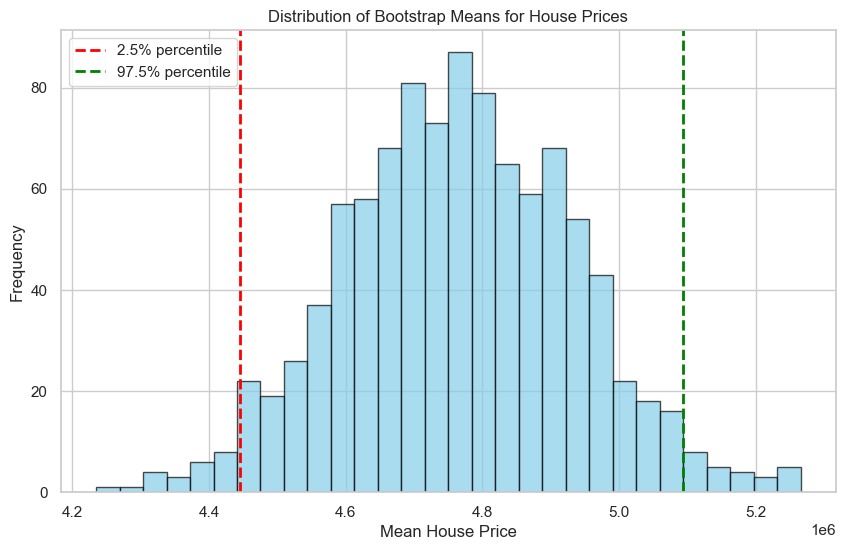

In [89]:
# Plot the distribution of bootstrap means with the confidence interval
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2, label='2.5% percentile')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='97.5% percentile')
plt.title('Distribution of Bootstrap Means for House Prices')
plt.xlabel('Mean House Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()